<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# **Data Split**
---

In [3]:
X = data_values[:, 0:8]
y = data_values[:, 8]

# **Holdount**
---



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None, shuffle = True)

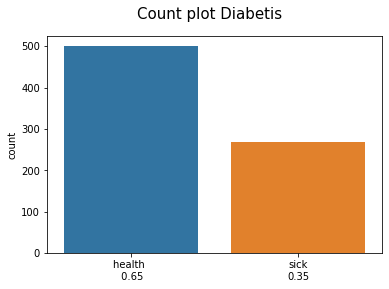

In [5]:
fig, ax = plt.subplots(figsize = (6, 4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x = data_values[:,8], ax = ax)
_, data_target = np.unique(data_values[:,8], return_counts = True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])
fig.show()

- Hay un desbalance

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(4, activation = 'relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [8]:
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f' % loss)

20/20 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.7964 - recall: 0.6077
Recall: 0.608
Accuracy: 0.796
Loss: 0.426


In [9]:
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % recall)
print('Val Accuracy: %.3f' % accuracy)
print('val Loss: %.3f'% loss)

5/5 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.7857 - recall: 0.6271
Val Recall: 0.608
Val Accuracy: 0.796
val Loss: 0.426


In [10]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# **Val loss and Loss**
---

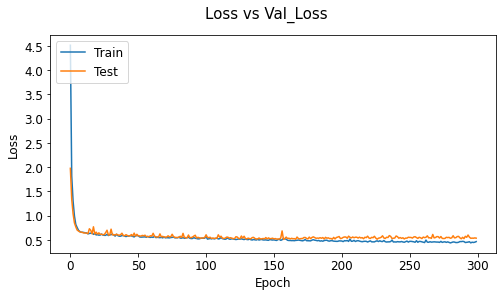

In [11]:
fig, ax = plt.subplots(figsize = (8, 4))
fig.suptitle('Loss vs Val_Loss', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge hasta cierto punto, se un presenta un ligero overfitting

# **Predictions**
---


In [12]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int32)

In [13]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[3.0, 115.0, 66.0, 39.0, 140.0, 38.1, 0.15, 28.0] --> 0 (real 0)
[0.0, 138.0, 60.0, 35.0, 167.0, 34.6, 0.534, 21.0] --> 0 (real 1)
[10.0, 179.0, 70.0, 0.0, 0.0, 35.1, 0.2, 37.0] --> 1 (real 0)
[2.0, 158.0, 90.0, 0.0, 0.0, 31.6, 0.805, 66.0] --> 1 (real 1)
[1.0, 128.0, 88.0, 39.0, 110.0, 36.5, 1.057, 37.0] --> 0 (real 1)
[1.0, 164.0, 82.0, 43.0, 67.0, 32.8, 0.341, 50.0] --> 0 (real 0)
[0.0, 128.0, 68.0, 19.0, 180.0, 30.5, 1.391, 25.0] --> 0 (real 1)
[1.0, 106.0, 70.0, 28.0, 135.0, 34.2, 0.142, 22.0] --> 0 (real 0)
[4.0, 110.0, 66.0, 0.0, 0.0, 31.9, 0.471, 29.0] --> 0 (real 0)
[1.0, 130.0, 70.0, 13.0, 105.0, 25.9, 0.472, 22.0] --> 0 (real 0)
[2.0, 130.0, 96.0, 0.0, 0.0, 22.6, 0.268, 21.0] --> 0 (real 0)
[4.0, 114.0, 65.0, 0.0, 0.0, 21.9, 0.432, 37.0] --> 0 (real 0)
[1.0, 80.0, 74.0, 11.0, 60.0, 30.0, 0.527, 22.0] --> 0 (real 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] --> 1 (real 1)
[1.0, 139.0, 46.0, 19.0, 83.0, 28.7, 0.654, 22.0] --> 0 (real 0)


# **Sesgo predictivo**
---





In [14]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos
# Sick
average_prediction = (len(y_pred[y_pred==1])/len(y_pred))
average_label_target = (len(y_test[y_test==1]) / len(y_test)) 
sesgo_prediction = average_prediction - average_label_target
sesgo_prediction

-0.07142857142857145

In [15]:
print(f'Promedio de predicciones:  {average_prediction}')
print(f'Promedio de etiquetas: {average_label_target}')
print(f'Sesgo de predicción: {sesgo_prediction}')

Promedio de predicciones:  0.3116883116883117
Promedio de etiquetas: 0.38311688311688313
Sesgo de predicción: -0.07142857142857145


- El modelo presenta un sesgo negativo (subestima)
- En promedio hay un 38% de personas con diabetes, pero mi modelo está prediciendo un 31%

# **Confusion Matrix**
---



In [16]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[84, 11],
       [22, 37]])

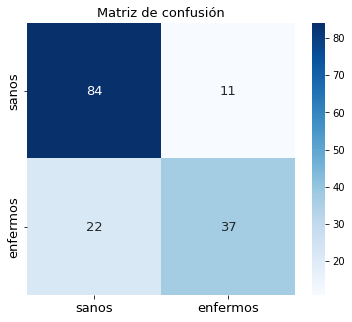

In [17]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

# Metrics

In [18]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Precision:   {metrics.precision_score(y_test, y_pred, labels=[1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, labels=[1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, labels=[1], average="macro")}' )

Accuracy  :   0.7857142857142857
Kappa     :   0.5300536341779175
predicción enfermos
Prediction:   0.7708333333333334
Recall    :   0.6271186440677966
Specificity:   0.8842105263157894
F1-score   :   0.6915887850467289


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [20]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []


for train, test in kfold.split(X, y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X[train], y[train], validation_data=(X[test], y[test]), verbose = 0)
  loss_train, _, recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

loss: 5.534 recall: 68.880% val_loss: 6.108 val_recall: 610.829%
loss: 5.979 recall: 45.228% val_loss: 5.704 val_recall: 570.431%
loss: 2.399 recall: 47.303% val_loss: 2.734 val_recall: 273.364%
loss: 1.485 recall: 24.896% val_loss: 1.423 val_recall: 142.286%
loss: 1.503 recall: 51.037% val_loss: 1.618 val_recall: 161.762%
loss: 2.142 recall: 60.166% val_loss: 2.168 val_recall: 216.818%
loss: 3.872 recall: 26.141% val_loss: 3.497 val_recall: 349.733%
loss: 1.912 recall: 40.249% val_loss: 1.873 val_recall: 187.273%
loss: 12.300 recall: 100.000% val_loss: 12.012 val_recall: 1201.163%
loss: 6.297 recall: 97.521% val_loss: 7.620 val_recall: 762.049%


In [21]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

==============================Train Recall Total 10 pliegues==============================
0.56% (+/- 0.25%)
==============================Test Recall Total 10 pliegues==============================
0.58% (+/- 0.23%)
==============================Train Loss Total 10 pliegues==============================
4.34% (+/- 3.20%)
==============================Test Loss Total 10 pliegues==============================
4.48% (+/- 3.23%)


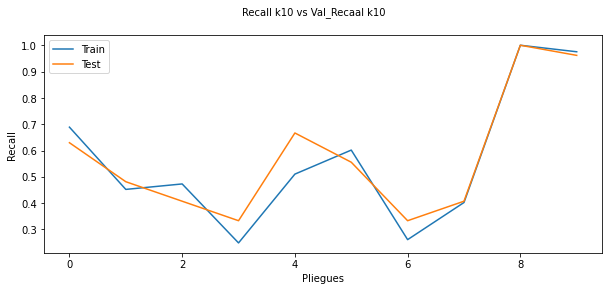

In [22]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

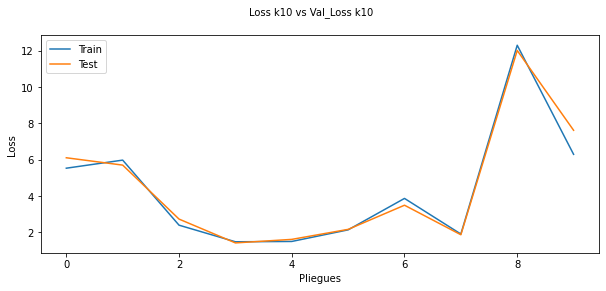

In [23]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

- El modelo presente fallas a la hora de predecir enfermos.
  - Se puede buscar más datos, agregar mas neuronas o utilizar una estrategia con el gradiente.